For each class, there is one pattern occurring in the data. Solving just a classification task be scored no higher than 70%. 

Please provide either pdf with the report or add some notes in the notebook. Demonstrate some examples of how your approach works.

A short reminder of your task:
 - Correct classification of provided time series
 - Explanation of the prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
np.random.seed(42)

In [3]:
n = 50000

In [4]:
def createRow(n, classes):
    base = np.sin(np.linspace((np.random.rand(3)),(np.random.rand(3) + np.array([10,15,7])),n))
    if classes[0] > 0:
        base[np.random.randint(0,n), 0] += 2
    if classes[1] > 0:
        base[np.random.randint(0,n), 1] -= 2
    if classes[2] > 0:
        x = np.random.randint(0,n-5)
        base[x:x+4,2] = 0
    if classes[3] > 0:
        x = np.random.randint(0,n-10)
        base[x:x+8,1] += 1.5
    if classes[4] > 0:
        x = np.random.randint(0,n-7)
        base[x:x+6,0] += 1.5
        base[x:x+6,2] -= 1.5
    base += np.random.rand(*base.shape)*.2
    return base

In [5]:
xl, yl = [], []
for _ in range(n):
    cl = np.random.rand(5)<.25
    xl.append(createRow(np.random.randint(40,60), cl))
    yl.append(cl)
    

[False False False False  True]


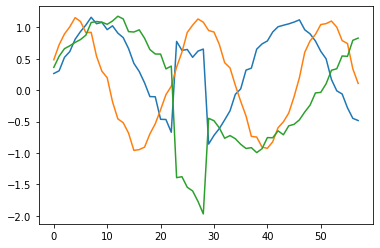

[False False False  True  True]


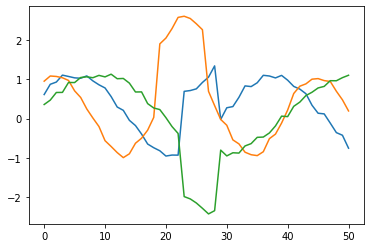

[False False False False False]


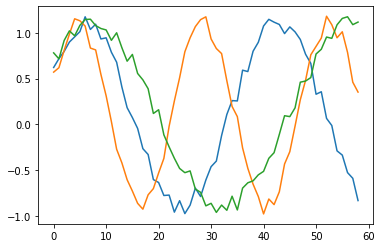

In [6]:
for i in range(3):
    plt.plot(xl[i])
    print(yl[i])
    plt.show()

In [7]:
from tensorflow.keras.layers import LSTM, GRU, Dense, Input, RepeatVector, TimeDistributed
from tensorflow.keras.layers import Reshape, GlobalMaxPool1D, Lambda, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import Sequence, plot_model

In [8]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    if pad_width[1] != 0:                      # <-- the only change (0 indicates no padding)
        vector[-pad_width[1]:] = pad_value

In [9]:
xl, yl = [], []
for i in range(n):
    cl = np.random.rand(5)<.25 #all False
    xl.append(createRow(np.random.randint(40,60), cl))

    xl[i] = np.pad(xl[i], ((0, 60 - len(xl[i])), (0, 0)), pad_with, padder=0)

    yl.append(cl)

[ True False False False False]


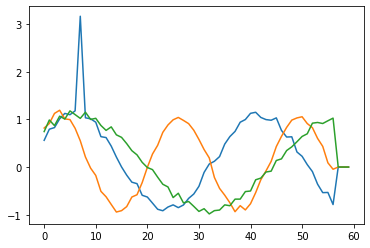

[ True False False False False]


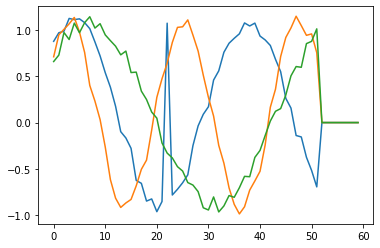

[False False False False False]


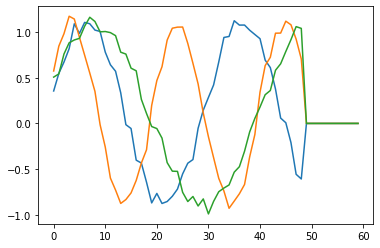

In [10]:
for i in range(3):
    plt.plot(xl[i])
    print(yl[i])
    plt.show()

In [11]:
xv, yv = [], []
for i in range(1000):
    cv = np.random.rand(5)<-.25 #all False
    xv.append(createRow(np.random.randint(40,60), cv))

    xv[i] = np.pad(xv[i], ((0, 60 - len(xv[i])), (0, 0)), pad_with, padder=0)

    yv.append(cv)

In [25]:
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(60,3)))
model.add(LSTM(64))
model.add(RepeatVector(50))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse', metrics='mae')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 60, 32)            4608      
                                                                 
 lstm_12 (LSTM)              (None, 64)                24832     
                                                                 
 repeat_vector_2 (RepeatVect  (None, 50, 64)           0         
 or)                                                             
                                                                 
 lstm_13 (LSTM)              (None, 50, 64)            33024     
                                                                 
 lstm_14 (LSTM)              (None, 50, 32)            12416     
                                                                 
 time_distributed_2 (TimeDis  (None, 50, 1)            33        
 tributed)                                            

In [38]:

train_x = np.array(xv)
train_y = np.array(yv)
train_y = np.expand_dims(train_y, axis=1)
#yl = yl.reshape(1, -1)
print(train_x.shape, train_y.shape)
model.fit(train_x, train_y, epochs=5)

(1000, 60, 3) (1000, 1, 5)
Epoch 1/5


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [17]:
print(yl[0])

[ True False False False False]
